# Testing `farley15` dataset

**Authorship:**
Adam Klie, *07/19/2022*
***
**Description:**
Notebook to test the working with the `farley15` dataset.
***

In [100]:
import pandas as pd
import numpy as np

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic import
import eugene as eu
eu.__version__

'0.0.0'

In [77]:
eu.settings.datasetdir = "../_data/datasets/"
eu.settings.datasetdir

PosixPath('/mnt/beegfs/users/aklie/projects/EUGENE/tests/_data/datasets')

In [80]:
sdata = eu.datasets.farley15()
sdata

Dataset farley15 farley2015_seqs.csv has already been dowloaded.
Dataset farley15 farley2015_seqs_annot.csv has already been dowloaded.


SeqData object with = 163708 seqs
seqs = (163708,)
names = (163708,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Barcode', 'Biological Replicate 1 (RPM)', 'Biological Replicate 2 (RPM)'
pos_annot: None
seqsm: None
uns: None

In [81]:
sdata.seqs_annot["SEQ_LEN"] = [len(seq) for seq in sdata.seqs]

In [82]:
sdata_processed = sdata[sdata["SEQ_LEN"] == 69]

In [83]:
eu.pp.prepare_data(sdata_processed)

  0%|          | 0/3 [00:00<?, ?it/s]

reverse_complement
one_hot_encode
train_test_split
SeqData object modified:
	rev_seqs: None -> 151810 rev_seqs added
	ohe_seqs: None -> 151810 ohe_seqs added
	ohe_rev_seqs: None -> 151810 ohe_rev_seqs added
    seqs_annot:
        + TRAIN


In [84]:
sdata_processed.seqs_annot["TARGETS"] = sdata_processed.seqs_annot[["Biological Replicate 1 (RPM)", "Biological Replicate 1 (RPM)"]].max(axis=1)

In [86]:
eu.pp.scale_targets(sdata_processed)

SeqData object modified:
    seqs_annot:
        + TARGETS_SCALED


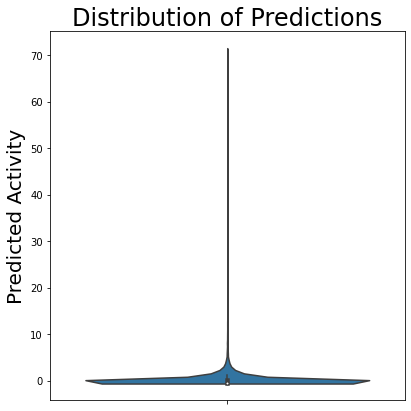

In [88]:
eu.pl.violin(sdata_processed, value="TARGETS_SCALED")

In [74]:
sdata_processed

SeqData object with = 151810 seqs
seqs = (151810,)
names = None
rev_seqs = (151810,)
ohe_seqs = (151810, 69, 4)
ohe_rev_seqs = (151810, 69, 4)
seqs_annot: 'Barcode', 'Biological Replicate 1 (RPM)', 'Biological Replicate 2 (RPM)', 'SEQ_LEN', 'TRAIN', 'TARGETS', 'TARGETS_SCALED'
pos_annot: None
seqsm: None
uns: None

In [93]:
add_seqs_annot = pd.read_csv("../_data/datasets/farley15/farley2015_seqs_annot.csv", index_col=1)

In [105]:
model = eu.models.DeepBind(input_len=69, output_dim=1)

In [107]:
eu.train.fit(model, sdata=sdata_processed, target_label="TARGETS_SCALED", epochs=10, log_dir="../_logs", out_dir="../_out/farley15")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type                      | Params
--------------------------------------------------------
0 | r_squared | R2Score                   | 0     
1 | max_pool  | MaxPool1d                 | 0     
2 | avg_pool  | AvgPool1d                 | 0     
3 | convnet   | BasicConv1D               | 272   
4 | fcn       | BasicFullyConnectedModule | 152 K 
--------------------------------------------------------
153 K     Trainable params
0         Non-trainable params
153 K     Total params
0.613     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

---

# Scratch

In [6]:
from eugene.datasets._utils import try_download_urls

In [13]:
urls_list = ["https://zenodo.org/record/6863861/files/farley2015_seqs.csv?download=1",
"https://zenodo.org/record/6863861/files/farley2015_seqs_annot.csv?download=1"]
paths = try_download_urls([0,1], urls_list, "farley15", compression = "") 

Dataset farley15 farley2015_seqs.csv has already been dowloaded.
Dataset farley15 farley2015_seqs_annot.csv has already been dowloaded.


In [14]:
path = paths[0]

In [ ]:
eu.dl.read_csv(path, sep=",", seq_col=seq_col, target_col=target_col, col_names=[seq_col,target_col], auto_name=True, compression="")